In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path =  "C:/Users/alexl/Documents/Python Scripts/sales_data_sample.csv"
df = pd.read_csv(path, encoding = "unicode_escape")

In [73]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [74]:
new_df = df.copy()

In [75]:
new_df.isna().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [76]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [77]:
new_df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [78]:
new_df = new_df.drop(["SALES", "MONTH_ID", "ADDRESSLINE2", "STATE", "TERRITORY"], axis = 1)
new_df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'ORDERDATE', 'STATUS', 'QTR_ID', 'YEAR_ID', 'PRODUCTLINE', 'MSRP',
       'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY',
       'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [79]:
new_df["SALES"] = new_df["QUANTITYORDERED"] * new_df["PRICEEACH"]
new_df["SALES"]

0       2871.00
1       2765.90
2       3884.34
3       3746.70
4       4900.00
         ...   
2818    2000.00
2819    2900.00
2820    4300.00
2821    2116.16
2822    3079.44
Name: SALES, Length: 2823, dtype: float64

In [80]:
col = new_df.pop("SALES")
new_df.insert(3, "SALES", col)
new_df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERLINENUMBER,ORDERDATE,STATUS,QTR_ID,YEAR_ID,PRODUCTLINE,...,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2871.00,2,2/24/2003 0:00,Shipped,1,2003,Motorcycles,...,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,2765.90,5,5/7/2003 0:00,Shipped,2,2003,Motorcycles,...,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,3884.34,2,7/1/2003 0:00,Shipped,3,2003,Motorcycles,...,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,3746.70,6,8/25/2003 0:00,Shipped,3,2003,Motorcycles,...,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10159,49,100.00,4900.00,14,10/10/2003 0:00,Shipped,4,2003,Motorcycles,...,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,NaN,USA,Brown,Julie,Medium


In [81]:
new_df["CONTACT_NAME"] = new_df["CONTACTLASTNAME"] + " " + new_df["CONTACTFIRSTNAME"]
new_df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERLINENUMBER,ORDERDATE,STATUS,QTR_ID,YEAR_ID,PRODUCTLINE,...,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,CONTACT_NAME
0,10107,30,95.70,2871.00,2,2/24/2003 0:00,Shipped,1,2003,Motorcycles,...,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small,Yu Kwai
1,10121,34,81.35,2765.90,5,5/7/2003 0:00,Shipped,2,2003,Motorcycles,...,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small,Henriot Paul
2,10134,41,94.74,3884.34,2,7/1/2003 0:00,Shipped,3,2003,Motorcycles,...,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium,Da Cunha Daniel
3,10145,45,83.26,3746.70,6,8/25/2003 0:00,Shipped,3,2003,Motorcycles,...,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium,Young Julie
4,10159,49,100.00,4900.00,14,10/10/2003 0:00,Shipped,4,2003,Motorcycles,...,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,NaN,USA,Brown,Julie,Medium,Brown Julie


In [82]:
new_df = new_df.drop(["CONTACTLASTNAME", "CONTACTFIRSTNAME"], axis = 1)
new_df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERLINENUMBER,ORDERDATE,STATUS,QTR_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,DEALSIZE,CONTACT_NAME
0,10107,30,95.70,2871.00,2,2/24/2003 0:00,Shipped,1,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Small,Yu Kwai
1,10121,34,81.35,2765.90,5,5/7/2003 0:00,Shipped,2,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Small,Henriot Paul
2,10134,41,94.74,3884.34,2,7/1/2003 0:00,Shipped,3,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Medium,Da Cunha Daniel
3,10145,45,83.26,3746.70,6,8/25/2003 0:00,Shipped,3,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Medium,Young Julie
4,10159,49,100.00,4900.00,14,10/10/2003 0:00,Shipped,4,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,NaN,USA,Medium,Brown Julie


In [83]:
col = new_df.pop("CONTACT_NAME")
new_df.insert(13, "CONTACT_NAME", col)
new_df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERLINENUMBER,ORDERDATE,STATUS,QTR_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CONTACT_NAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,DEALSIZE
0,10107,30,95.70,2871.00,2,2/24/2003 0:00,Shipped,1,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,Yu Kwai,2125557818,897 Long Airport Avenue,NYC,10022,USA,Small
1,10121,34,81.35,2765.90,5,5/7/2003 0:00,Shipped,2,2003,Motorcycles,95,S10_1678,Reims Collectables,Henriot Paul,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Small
2,10134,41,94.74,3884.34,2,7/1/2003 0:00,Shipped,3,2003,Motorcycles,95,S10_1678,Lyon Souveniers,Da Cunha Daniel,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Medium
3,10145,45,83.26,3746.70,6,8/25/2003 0:00,Shipped,3,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,Young Julie,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Medium
4,10159,49,100.00,4900.00,14,10/10/2003 0:00,Shipped,4,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,Brown Julie,6505551386,7734 Strong St.,San Francisco,NaN,USA,Medium


In [84]:
new_df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'SALES',
       'ORDERLINENUMBER', 'ORDERDATE', 'STATUS', 'QTR_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'CONTACT_NAME',
       'PHONE', 'ADDRESSLINE1', 'CITY', 'POSTALCODE', 'COUNTRY', 'DEALSIZE'],
      dtype='object')

In [85]:
new_df["ORDERDATE"] = pd.to_datetime(new_df["ORDERDATE"])
new_df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERLINENUMBER,ORDERDATE,STATUS,QTR_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CONTACT_NAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,DEALSIZE
0,10107,30,95.70,2871.00,2,2003-02-24,Shipped,1,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,Yu Kwai,2125557818,897 Long Airport Avenue,NYC,10022,USA,Small
1,10121,34,81.35,2765.90,5,2003-05-07,Shipped,2,2003,Motorcycles,95,S10_1678,Reims Collectables,Henriot Paul,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Small
2,10134,41,94.74,3884.34,2,2003-07-01,Shipped,3,2003,Motorcycles,95,S10_1678,Lyon Souveniers,Da Cunha Daniel,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Medium
3,10145,45,83.26,3746.70,6,2003-08-25,Shipped,3,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,Young Julie,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Medium
4,10159,49,100.00,4900.00,14,2003-10-10,Shipped,4,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,Brown Julie,6505551386,7734 Strong St.,San Francisco,NaN,USA,Medium


In [86]:
new_df["MONTHS"] = new_df["ORDERDATE"].dt.month_name()
new_df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERLINENUMBER,ORDERDATE,STATUS,QTR_ID,YEAR_ID,PRODUCTLINE,...,PRODUCTCODE,CUSTOMERNAME,CONTACT_NAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,DEALSIZE,MONTHS
0,10107,30,95.70,2871.00,2,2003-02-24,Shipped,1,2003,Motorcycles,...,S10_1678,Land of Toys Inc.,Yu Kwai,2125557818,897 Long Airport Avenue,NYC,10022,USA,Small,February
1,10121,34,81.35,2765.90,5,2003-05-07,Shipped,2,2003,Motorcycles,...,S10_1678,Reims Collectables,Henriot Paul,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Small,May
2,10134,41,94.74,3884.34,2,2003-07-01,Shipped,3,2003,Motorcycles,...,S10_1678,Lyon Souveniers,Da Cunha Daniel,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Medium,July
3,10145,45,83.26,3746.70,6,2003-08-25,Shipped,3,2003,Motorcycles,...,S10_1678,Toys4GrownUps.com,Young Julie,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Medium,August
4,10159,49,100.00,4900.00,14,2003-10-10,Shipped,4,2003,Motorcycles,...,S10_1678,Corporate Gift Ideas Co.,Brown Julie,6505551386,7734 Strong St.,San Francisco,NaN,USA,Medium,October


In [87]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ORDERNUMBER      2823 non-null   int64         
 1   QUANTITYORDERED  2823 non-null   int64         
 2   PRICEEACH        2823 non-null   float64       
 3   SALES            2823 non-null   float64       
 4   ORDERLINENUMBER  2823 non-null   int64         
 5   ORDERDATE        2823 non-null   datetime64[ns]
 6   STATUS           2823 non-null   object        
 7   QTR_ID           2823 non-null   int64         
 8   YEAR_ID          2823 non-null   int64         
 9   PRODUCTLINE      2823 non-null   object        
 10  MSRP             2823 non-null   int64         
 11  PRODUCTCODE      2823 non-null   object        
 12  CUSTOMERNAME     2823 non-null   object        
 13  CONTACT_NAME     2823 non-null   object        
 14  PHONE            2823 non-null   object 

In [88]:
col = new_df.pop("MONTHS")
new_df.insert(8, "MONTHS", col)
new_df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERLINENUMBER,ORDERDATE,STATUS,QTR_ID,MONTHS,YEAR_ID,...,MSRP,PRODUCTCODE,CUSTOMERNAME,CONTACT_NAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,DEALSIZE
0,10107,30,95.70,2871.00,2,2003-02-24,Shipped,1,February,2003,...,95,S10_1678,Land of Toys Inc.,Yu Kwai,2125557818,897 Long Airport Avenue,NYC,10022,USA,Small
1,10121,34,81.35,2765.90,5,2003-05-07,Shipped,2,May,2003,...,95,S10_1678,Reims Collectables,Henriot Paul,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Small
2,10134,41,94.74,3884.34,2,2003-07-01,Shipped,3,July,2003,...,95,S10_1678,Lyon Souveniers,Da Cunha Daniel,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Medium
3,10145,45,83.26,3746.70,6,2003-08-25,Shipped,3,August,2003,...,95,S10_1678,Toys4GrownUps.com,Young Julie,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Medium
4,10159,49,100.00,4900.00,14,2003-10-10,Shipped,4,October,2003,...,95,S10_1678,Corporate Gift Ideas Co.,Brown Julie,6505551386,7734 Strong St.,San Francisco,NaN,USA,Medium


In [89]:
def nan(new_df):
    nan = new_df.isna().sum().reset_index()
    nan.columns = ["columns", "counts"]
    missing = nan[nan["counts"] > 0]
    m_s = np.array(missing["columns"])
    return m_s

In [90]:
x = nan(new_df)
x

array(['POSTALCODE'], dtype=object)

In [91]:
for i in x:
    new_df = df.fillna("UNKNOWN")
new_df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,UNKNOWN,NYC,NY,10022,USA,UNKNOWN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,UNKNOWN,Reims,UNKNOWN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,UNKNOWN,Paris,UNKNOWN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,UNKNOWN,Pasadena,CA,90003,USA,UNKNOWN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,UNKNOWN,San Francisco,CA,UNKNOWN,USA,UNKNOWN,Brown,Julie,Medium


# DATA VISUALISATION

<AxesSubplot:xlabel='YEAR_ID'>

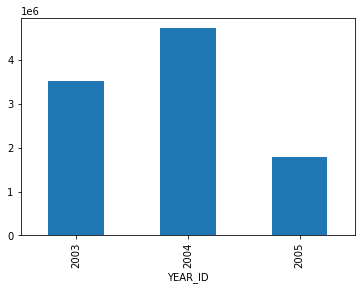

In [92]:
# NEW_DF = new_df["YEAR_ID", "SALES"]
highest_sold = new_df.groupby("YEAR_ID") ["SALES"].sum()
highest_sold.plot(kind = "bar")

In [93]:
YR4 = new_df[(new_df.YEAR_ID) == 2004]
YR4

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
9,10211,41,100.00,14,4708.44,1/15/2004 0:00,Shipped,1,1,2004,...,"25, rue Lauriston",UNKNOWN,Paris,UNKNOWN,75016,France,EMEA,Perrier,Dominique,Medium
10,10223,37,100.00,1,3965.66,2/20/2004 0:00,Shipped,1,2,2004,...,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Medium
11,10237,23,100.00,7,2333.12,4/5/2004 0:00,Shipped,2,4,2004,...,2678 Kingston Rd.,Suite 101,NYC,NY,10022,USA,UNKNOWN,Frick,Michael,Small
12,10251,28,100.00,2,3188.64,5/18/2004 0:00,Shipped,2,5,2004,...,7476 Moss Rd.,UNKNOWN,Newark,NJ,94019,USA,UNKNOWN,Brown,William,Medium
13,10263,34,100.00,2,3676.76,6/28/2004 0:00,Shipped,2,6,2004,...,25593 South Bay Ln.,UNKNOWN,Bridgewater,CT,97562,USA,UNKNOWN,King,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2814,10306,35,59.51,6,2082.85,10/14/2004 0:00,Shipped,4,10,2004,...,Fauntleroy Circus,UNKNOWN,Manchester,UNKNOWN,EC2 5NT,UK,EMEA,Ashworth,Victoria,Small
2815,10315,40,55.69,5,2227.60,10/29/2004 0:00,Shipped,4,10,2004,...,"67, rue des Cinquante Otages",UNKNOWN,Nantes,UNKNOWN,44000,France,EMEA,Labrune,Janine,Small
2816,10327,37,86.74,4,3209.38,11/10/2004 0:00,Resolved,4,11,2004,...,Vinb'ltet 34,UNKNOWN,Kobenhavn,UNKNOWN,1734,Denmark,EMEA,Petersen,Jytte,Medium
2817,10337,42,97.16,5,4080.72,11/21/2004 0:00,Shipped,4,11,2004,...,5905 Pompton St.,Suite 750,NYC,NY,10022,USA,UNKNOWN,Hernandez,Maria,Medium


<AxesSubplot:ylabel='SALES'>

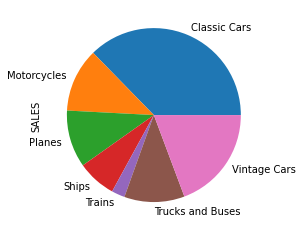

In [94]:
hsp = YR4.groupby("PRODUCTLINE")["SALES"].sum()
hsp.plot(kind = "pie")

In [95]:
prod = YR4[(YR4.PRODUCTLINE)== "Classic Cars"]
prod


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
36,10215,35,100.00,3,6075.30,1/29/2004 0:00,Shipped,1,1,2004,...,3675 Furth Circle,UNKNOWN,Burbank,CA,94019,USA,UNKNOWN,Thompson,Steve,Medium
37,10228,29,100.00,2,6463.23,3/10/2004 0:00,Shipped,1,3,2004,...,4658 Baden Av.,UNKNOWN,Cambridge,MA,51247,USA,UNKNOWN,Tseng,Kyung,Medium
38,10245,34,100.00,9,6120.34,5/4/2004 0:00,Shipped,2,5,2004,...,567 North Pendale Street,UNKNOWN,New Haven,CT,97823,USA,UNKNOWN,Murphy,Leslie,Medium
39,10258,32,100.00,6,7680.64,6/15/2004 0:00,Shipped,2,6,2004,...,2-2-8 Roppongi,UNKNOWN,Minato-ku,Tokyo,106-0032,Japan,Japan,Shimamura,Akiko,Large
40,10270,21,100.00,9,4905.39,7/19/2004 0:00,Shipped,3,7,2004,...,"Monitor Money Building, 815 Pacific Hwy",Level 6,Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,10313,30,99.13,9,2973.90,10/22/2004 0:00,Shipped,4,10,2004,...,1900 Oak St.,UNKNOWN,Vancouver,BC,V3F 2K1,Canada,UNKNOWN,Tannamuri,Yoshi,Small
2633,10324,34,100.00,5,4248.30,11/5/2004 0:00,Shipped,4,11,2004,...,2678 Kingston Rd.,Suite 101,NYC,NY,10022,USA,UNKNOWN,Frick,Michael,Medium
2634,10336,46,100.00,2,9558.80,11/20/2004 0:00,Shipped,4,11,2004,...,"265, boulevard Charonne",UNKNOWN,Paris,UNKNOWN,75012,France,EMEA,Bertrand,Marie,Large
2635,10348,32,82.83,7,2650.56,11/1/2004 0:00,Shipped,4,11,2004,...,"C/ Araquil, 67",UNKNOWN,Madrid,UNKNOWN,28023,Spain,EMEA,Sommer,Mart¡n,Small


<AxesSubplot:>

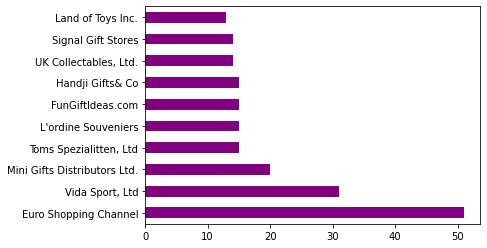

In [96]:
customer = prod["CUSTOMERNAME"].value_counts().head(10)
customer.plot(kind = "barh", color = "purple")

In [97]:
def high_q(yr):
    yrs = new_df[(new_df.YEAR_ID)== yr]
    qtr = yrs.groupby("QTR_ID") ["SALES"].sum()
    qtr.plot(kind = "bar", color = "green")

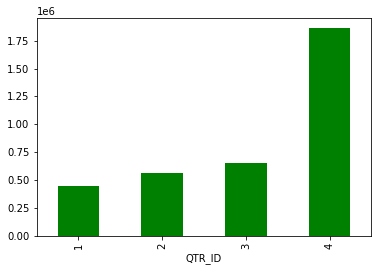

In [98]:
high_q(2003)

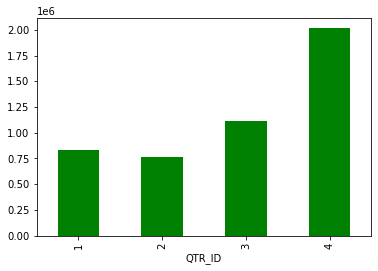

In [99]:
high_q(2004)

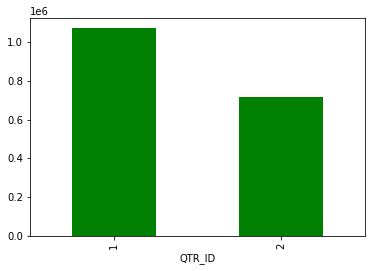

In [100]:
high_q(2005)

In [101]:
new_df["PRODUCTLINE"].value_counts()

Classic Cars        967
Vintage Cars        607
Motorcycles         331
Planes              306
Trucks and Buses    301
Ships               234
Trains               77
Name: PRODUCTLINE, dtype: int64

In [123]:
def prod(yr):
    yrs = new_df[(new_df.PRODUCTLINE)== yr]
    prd = new_df[["CUSTOMERNAME", "PRODUCTLINE", "QUANTITYORDERED"]]
    qtr = yrs.groupby(["CUSTOMERNAME", "PRODUCTLINE"]) ["QUANTITYORDERED"].sum()
    qtr.loc[qtr["QUANTITYORDERED"] == max(qtr["QUANTITYORDERED"])]
#     qtr.plot(kind = "line")

In [ ]:
most_sold = new_df[["Description", "Quantity", "Country"]]
mst = most_sold.groupby(["Description","Country"])["Quantity"].sum().reset_index()
mst.columns = ["Products", "Country", "Total_Qty"]

mst.loc[mst["Total_Qty"] == max(mst["Total_Qty"])]

In [124]:
prod(2003)

KeyError: 'QUANTITYORDERED'